<a href="https://colab.research.google.com/github/ShrimanthAM/DATA606Project/blob/main/YOLOv4_tiny_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### source code repo : https://github.com/AlexeyAB/darknet forked from https://pjreddie.com/darknet/


# YOLOv4_tiny

### 1. Clone the Darknet Repo

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15035, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 15035 (delta 11), reused 17 (delta 6), pack-reused 15002
Receiving objects: 100% (15035/15035), 13.45 MiB | 16.22 MiB/s, done.
Resolving deltas: 100% (10210/10210), done.


### 2.Make changes in the coniguration file to enable GPU and OPENCV

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

[Errno 2] No such file or directory: 'darknet'
/content/darknet


In [ ]:
# looking at CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 3. build darknet - make it executable

In [ ]:

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

### 5. Defining functions to display the prediction

In [ ]:
# defining the helping function to display the image


def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [ ]:
!pwd

/content/darknet


# Training the model on my custom data

## Required files 
1. test and train configuration files
2. data zip folder with images and corresponding labels text file
3. data and names file
4. train and val split file

These files have been uploaded to yolov4 google drive folder for easy access

In [ ]:
#%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# creating a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 2009.05451.pdf
'3rd Sem_Fall 2020 '
'5th Main Road 10.m4a'
'602 links.gdoc'
 603_project
'603 Project docs.gdoc'
 Articles.gdoc
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Chapter_12_Cognitive_Computing).pdf'
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Other_Books_You_May_Enjoy).pdf'
'August 2020.gdoc'
'August 2020.pdf'
'AWS Cloud Practitioner .gdoc'
 AWSome_Day_Online-Oct_16__2019.pdf
 AWSProServInternship
'Basic Architecture.gslides'
'Beta Release Review Assignment.gdoc'
 BUSTrPaper.pdf
 chatbot_covid.ipynb
'Cloud .gdoc'
 CMSC636FinalPresentation.gslides
'Colab Notebooks'
'Copy of Poster Template.gslides'
 DATA606
'DATA690 Fall 2020: S1.gdoc'
'Data690  HW1 S20 Sai Manikanta Yerram'
'Data690 HW4 S20 Sai Manikanta Yerram'
 DATA690NLP_PPT.gslides
'Document from Shrimanth'
 EDA_steps.gdoc
 Final_Exam
'Gmail - MPS DS Semester 1 Subjects.pdf'
 GraphDatabasesinFraudDetection.pdf
 HomeWork8.drawio
 IMG-20200606-WA0016.jpg
 ImpDocuments
 India2020Printouts
 

In [ ]:
!pwd

/content/darknet


### 1. I have stored all my required files for training in yolov4 folder of Google drive

In [ ]:
!ls /mydrive/yolov4

obj.data		    yolov4_custom_train.cfg
obj.names		    yolov4_custom_train_last.weights
obj.zip			    yolov4-tiny.conv.29
PXL_20210429_182017798.jpg  yolov4_tiny_test.cfg
PXL_20210429_182050525.jpg  yolov4_tiny_train.cfg
train.txt		    yolov4_tiny_train_final.weights
val.txt			    yolov4-tiny.weights
yolov4_custom_test.cfg


In [ ]:
# copy the data zip folder to Google colab runtime
!cp /mydrive/yolov4/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/0090f02cab.jpg  
  inflating: data/obj/0090f02cab.txt  
  inflating: data/obj/00d58c45ca.jpg  
  inflating: data/obj/00d58c45ca.txt  
  inflating: data/obj/01c53361f1.jpg  
  inflating: data/obj/01c53361f1.txt  
  inflating: data/obj/02454e17d0.jpg  
  inflating: data/obj/02454e17d0.txt  
  inflating: data/obj/02ced4ca2d.jpg  
  inflating: data/obj/02ced4ca2d.txt  
  inflating: data/obj/032b1d8b38.jpg  
  inflating: data/obj/032b1d8b38.txt  
  inflating: data/obj/053e81e4f6.jpg  
 extracting: data/obj/053e81e4f6.txt  
  inflating: data/obj/07b22d4b2d.jpg  
  inflating: data/obj/07b22d4b2d.txt  
  inflating: data/obj/07be4f3426.jpg  
  inflating: data/obj/07be4f3426.txt  
  inflating: data/obj/0a4fa50ba0.jpg  
  inflating: data/obj/0a4fa50ba0.txt  
  inflating: data/obj/0dbbfbda0c.jpg  
  inflating: data/obj/0dbbfbda0c.txt  
  inflating: data/obj/0f69014c64.jpg  
  inflating: data/obj/0f69014c64.txt  
  inflating: data/ob

In [ ]:
# upload the custom train .cfg to Google Colab runtime from Google Drive
!cp /mydrive/yolov4/yolov4_tiny_train.cfg ./cfg

In [ ]:
# upload the custom test .cfg to Google Colab runtime from Google Drive
!cp /mydrive/yolov4/yolov4_tiny_test.cfg ./cfg


In [ ]:
# upload the obj.names and obj.data files to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
#upload the validation file to runtime from Google drive
!cp /mydrive/yolov4/val.txt ./data

In [ ]:
#upload the train file to runtime from Google drive
!cp /mydrive/yolov4/train.txt ./data

In [ ]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  val.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


### Upload the pretrained convolutional layer weights(initial weights)

In [ ]:
!cp /mydrive/yolov4/yolov4-tiny.conv.29 /content/darknet

### Training the model

In [ ]:

!./darknet detector train data/obj.data cfg/yolov4_tiny_train.cfg yolov4-tiny.conv.29 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 528369, rewritten_bbox = 0.023468 % 

 Tensor Cores are used.

 3395: 0.129437, 0.163887 avg loss, 0.000261 rate, 0.377404 seconds, 217280 images, 0.136702 hours left
Loaded: 0.395866 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.852666), count: 88, class_loss = 0.239205, iou_loss = 0.705909, total_loss = 0.945113 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.845994), count: 81, class_loss = 0.239362, iou_loss = 3.729905, total_loss = 3.969267 
 total_bbox = 528538, rewritten_bbox = 0.023461 % 

 Tensor Cores are used.

 3396: 0.239448, 0.171443 avg loss, 0.000261 rate, 0.269409 seconds, 217344 images, 0.136162 hours left
Loaded: 0.545251 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.874925), count: 72, c

### displaying the evaluation mAP values on the latest weights(i.e after 4000 epochs)

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4_tiny_test.cfg /content/gdrive/MyDrive/yolov4/yolov4_tiny_train_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

### testing the model on few images and a video file captured pi camera 

In [ ]:
#video file
!./darknet detector demo data/obj.data cfg/yolov4_tiny_test.cfg /content/gdrive/MyDrive/yolov4/yolov4_tiny_train_final.weights -dont_show video.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.
FPS:17.5 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 27% 

FPS:17.6 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 28% 

FPS:17.4 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:17.5 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:17.6 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 32% 

FPS:17.1 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 40% 

FPS:16.7 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:16.9 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:18.3 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 33% 

FPS:19.1 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 43% 

FPS:18.5 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:17.9 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:18.1 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:18.2 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FPS:18.5 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 35% 

FPS:19.5 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:

box: 53% 

FPS:18.9 	 AVG_FPS:16.6

 cvWriteFrame 
Objects:


FP

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/darknet/data/obj/0f69014c64.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

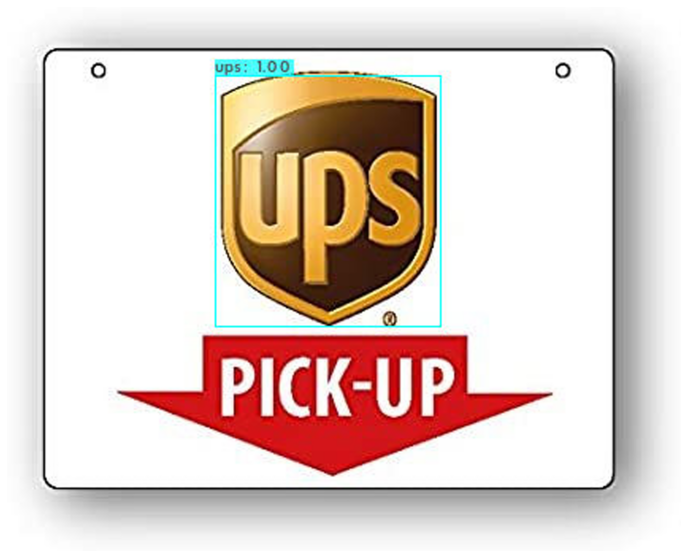

In [ ]:
imShow('predictions.jpg')

In [ ]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/darknet/data/obj/0090f02cab.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

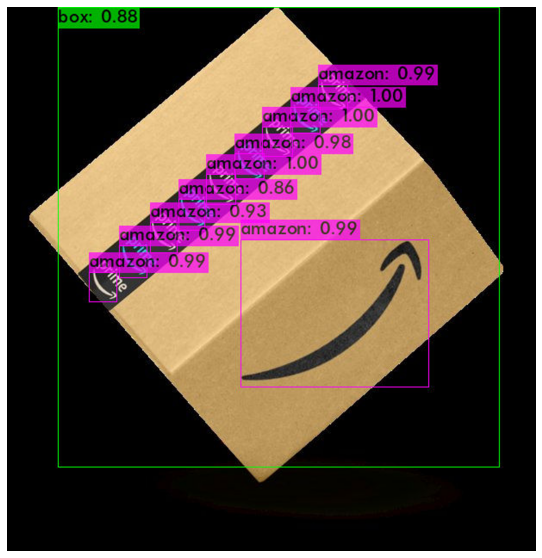

In [ ]:
imShow('predictions.jpg')

In [ ]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/gdrive/MyDrive/yolov4/PXL_20210429_182017798.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

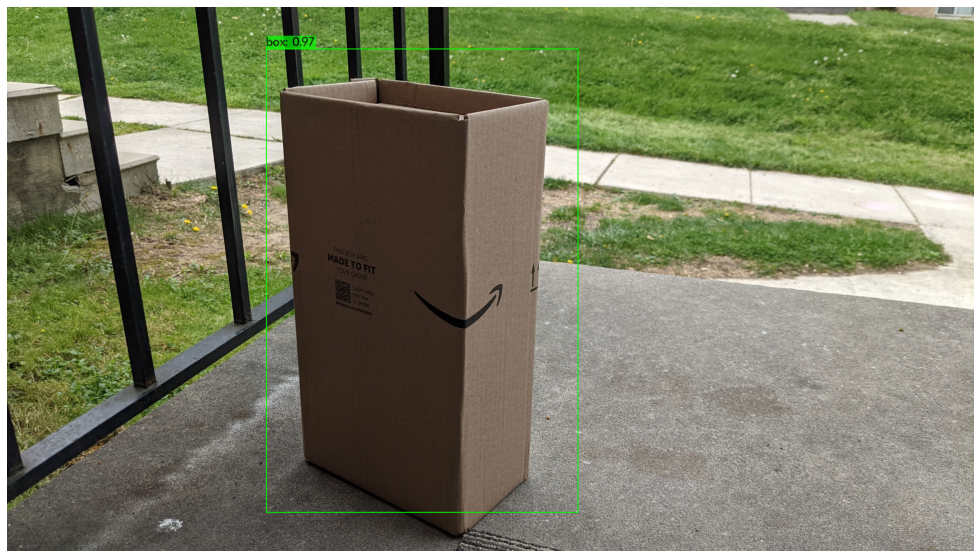

In [ ]:
imShow('predictions.jpg')

In [ ]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/darknet/backup/yolov4_tiny_train_final.weights /content/gdrive/MyDrive/yolov4/PXL_20210429_182050525.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 1, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

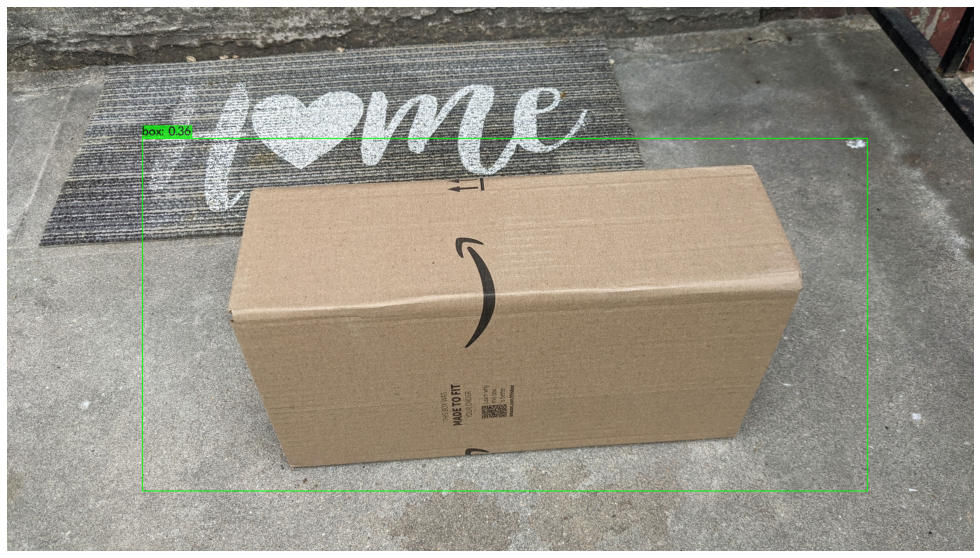

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_tiny_test.cfg /content/gdrive/MyDrive/yolov4/yolov4_tiny_train_final.weights /content/darknet/data/obj/0dbbfbda0c.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

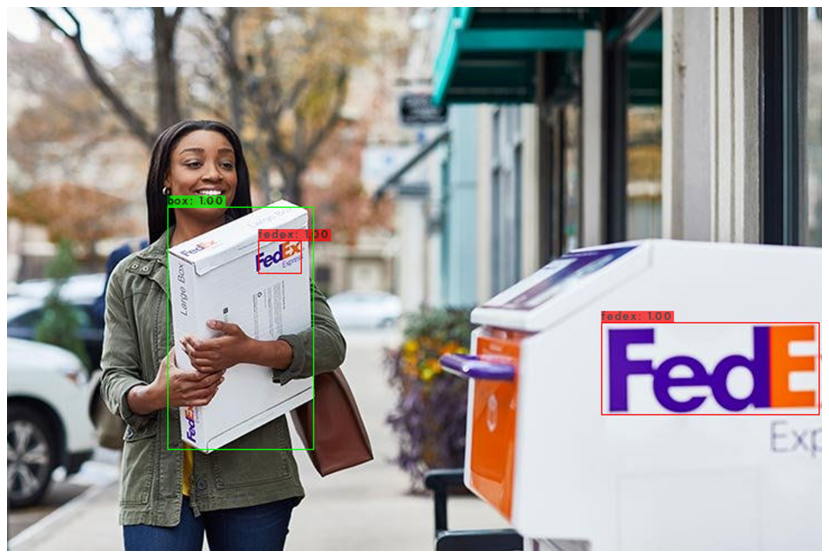

In [ ]:
imShow('predictions.jpg')